Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Generating Distribution Plots...


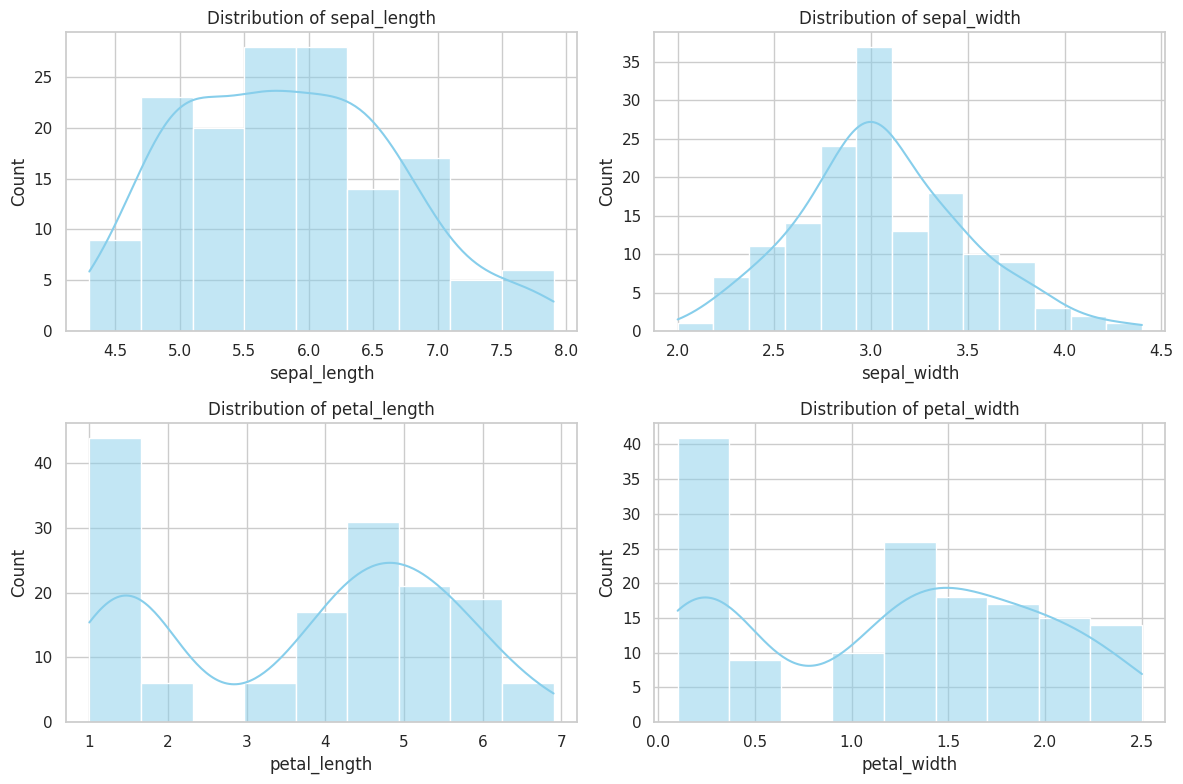

Generating Categorical Count Plot...


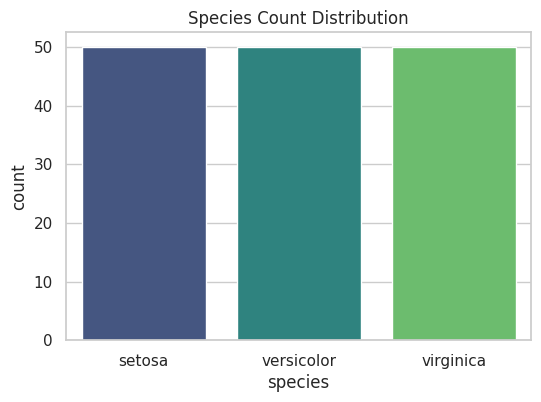

Generating Box Plots for Outliers...


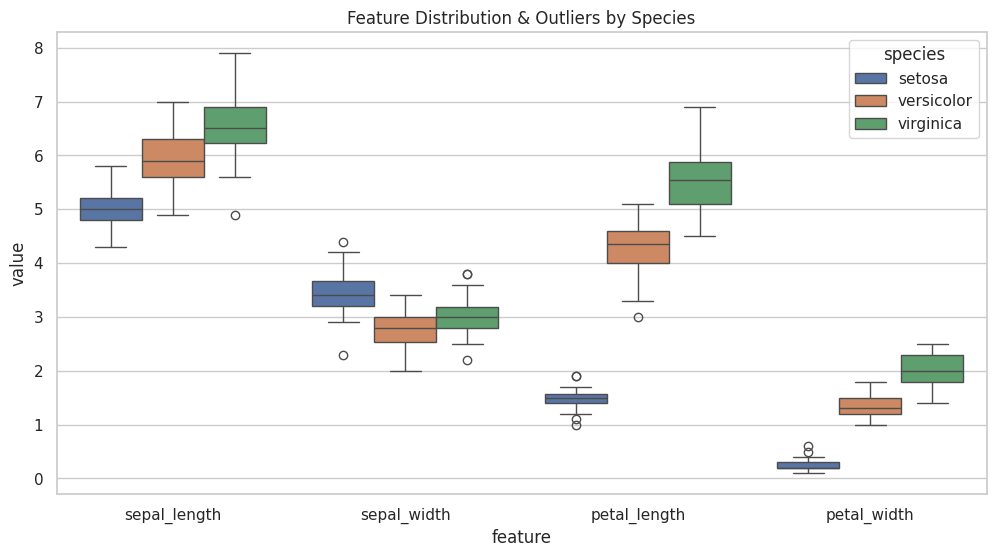

Generating Correlation Heatmap...


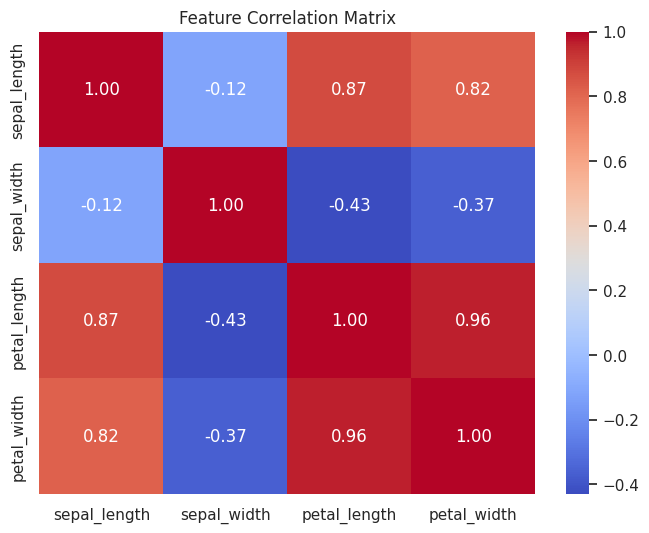


VISUAL INSIGHTS REPORT
1. Data Distribution:
   - Petal Length and Petal Width show a bimodal distribution (two peaks).
   - This suggests a clear separation between at least two species.

2. Outliers:
   - Several outliers were detected in 'Sepal Width' for the Virginica species.
   - Other features have relatively clean distributions.

3. Correlation Analysis:
   - Highest positive correlation: 1.00 (Petal Length & Petal Width).
   - Sepal Width has a weak or negative correlation with other features.

4. Predictive Features:
   - Petal Length and Petal Width are the most important features.
   - They show the clearest distinct separation between species in the histograms.


In [2]:
# Exploratory Data Analysis (EDA) on Iris Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset directly from Seaborn
# This avoids the need for manual file uploads
df = sns.load_dataset('iris')

# Display first few rows to check data structure
print("Dataset Preview:")
print(df.head())

# Set a professional visual theme
sns.set_theme(style="whitegrid")

# 1. Plot distribution of numerical features (Histograms)
# We loop through numerical columns to create histograms dynamically
print("\nGenerating Distribution Plots...")
plt.figure(figsize=(12, 8))
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Analyze categorical features (Count Plot)
#  Added hue='species' and legend=False to silence the warning
print("Generating Categorical Count Plot...")
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, hue='species', palette='viridis', legend=False)
plt.title('Species Count Distribution')
plt.show()

# 3. Identify Outliers (Box Plots)
# Box plots help visualize the spread and detect outliers (points outside whiskers)
print("Generating Box Plots for Outliers...")
plt.figure(figsize=(12, 6))
# Melt allows us to plot all features side-by-side easily
df_melted = df.melt(id_vars='species', var_name='feature', value_name='value')
sns.boxplot(x='feature', y='value', hue='species', data=df_melted)
plt.title('Feature Distribution & Outliers by Species')
plt.show()

# 4. Correlation Heatmap
# Understanding which features move together
print("Generating Correlation Heatmap...")
plt.figure(figsize=(8, 6))
# We drop the 'species' column because correlation requires numbers only
corr_matrix = df.drop(columns=['species']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# 5, 6, & 7. Insights and Findings Report
# Summarizing findings programmatically
print("\n" + "="*40)
print("VISUAL INSIGHTS REPORT")
print("="*40)
print("1. Data Distribution:")
print("   - Petal Length and Petal Width show a bimodal distribution (two peaks).")
print("   - This suggests a clear separation between at least two species.")

print("\n2. Outliers:")
print("   - Several outliers were detected in 'Sepal Width' for the Virginica species.")
print("   - Other features have relatively clean distributions.")

print("\n3. Correlation Analysis:")
print(f"   - Highest positive correlation: {corr_matrix.max().sort_values(ascending=False).iloc[1]:.2f} (Petal Length & Petal Width).")
print("   - Sepal Width has a weak or negative correlation with other features.")

print("\n4. Predictive Features:")
print("   - Petal Length and Petal Width are the most important features.")
print("   - They show the clearest distinct separation between species in the histograms.")
print("="*40)